# Decission Tree Classification Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy.stats import zscore
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report,confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# data splitting

In [4]:
x=df.drop('target',axis=1)
y=df['target']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# model building

In [6]:
df_model=DecisionTreeClassifier()
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

# model testing

In [7]:
# training data evaluation

y_pred_train=df_model.predict(x_train)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix is \n: ',cnf_mat)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy is : ',acc_score)

clf_rep=classification_report(y_train,y_pred_train)
print('classification report is: ',clf_rep)



confusion matrix is 
:  [[108   0]
 [  0 134]]
accuracy is :  1.0
classification report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [8]:
# testing data evaluation

y_pred=df_model.predict(x_test)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix is \n: ',cnf_mat)

acc_score=accuracy_score(y_test,y_pred)
print('accuracy is : ',acc_score)

clf_rep=classification_report(y_test,y_pred)
print('classification report is: ',clf_rep)



confusion matrix is 
:  [[22  8]
 [ 7 24]]
accuracy is :  0.7540983606557377
classification report is:                precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.75      0.77      0.76        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



# Plotting

In [11]:
plt.figure(figsize=(200,200))
tree=plot_tree(df_model,feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Decission_Tree')

# Hyperparameter Tuning

In [14]:
dt_model=DecisionTreeClassifier()

hyp={'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'min_samples_split':np.arange(2,20),   
    'min_samples_leaf':np.arange(1,10)}

gscv_dt_model=GridSearchCV(dt_model,hyp,cv=5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [15]:
gscv_dt_model.best_estimator_ # here it has not given values of criterion and min sample leaf so by deafault it has taken 
                              # criterion gini and min sample leaf node 1.

DecisionTreeClassifier(max_depth=5, min_samples_split=18)

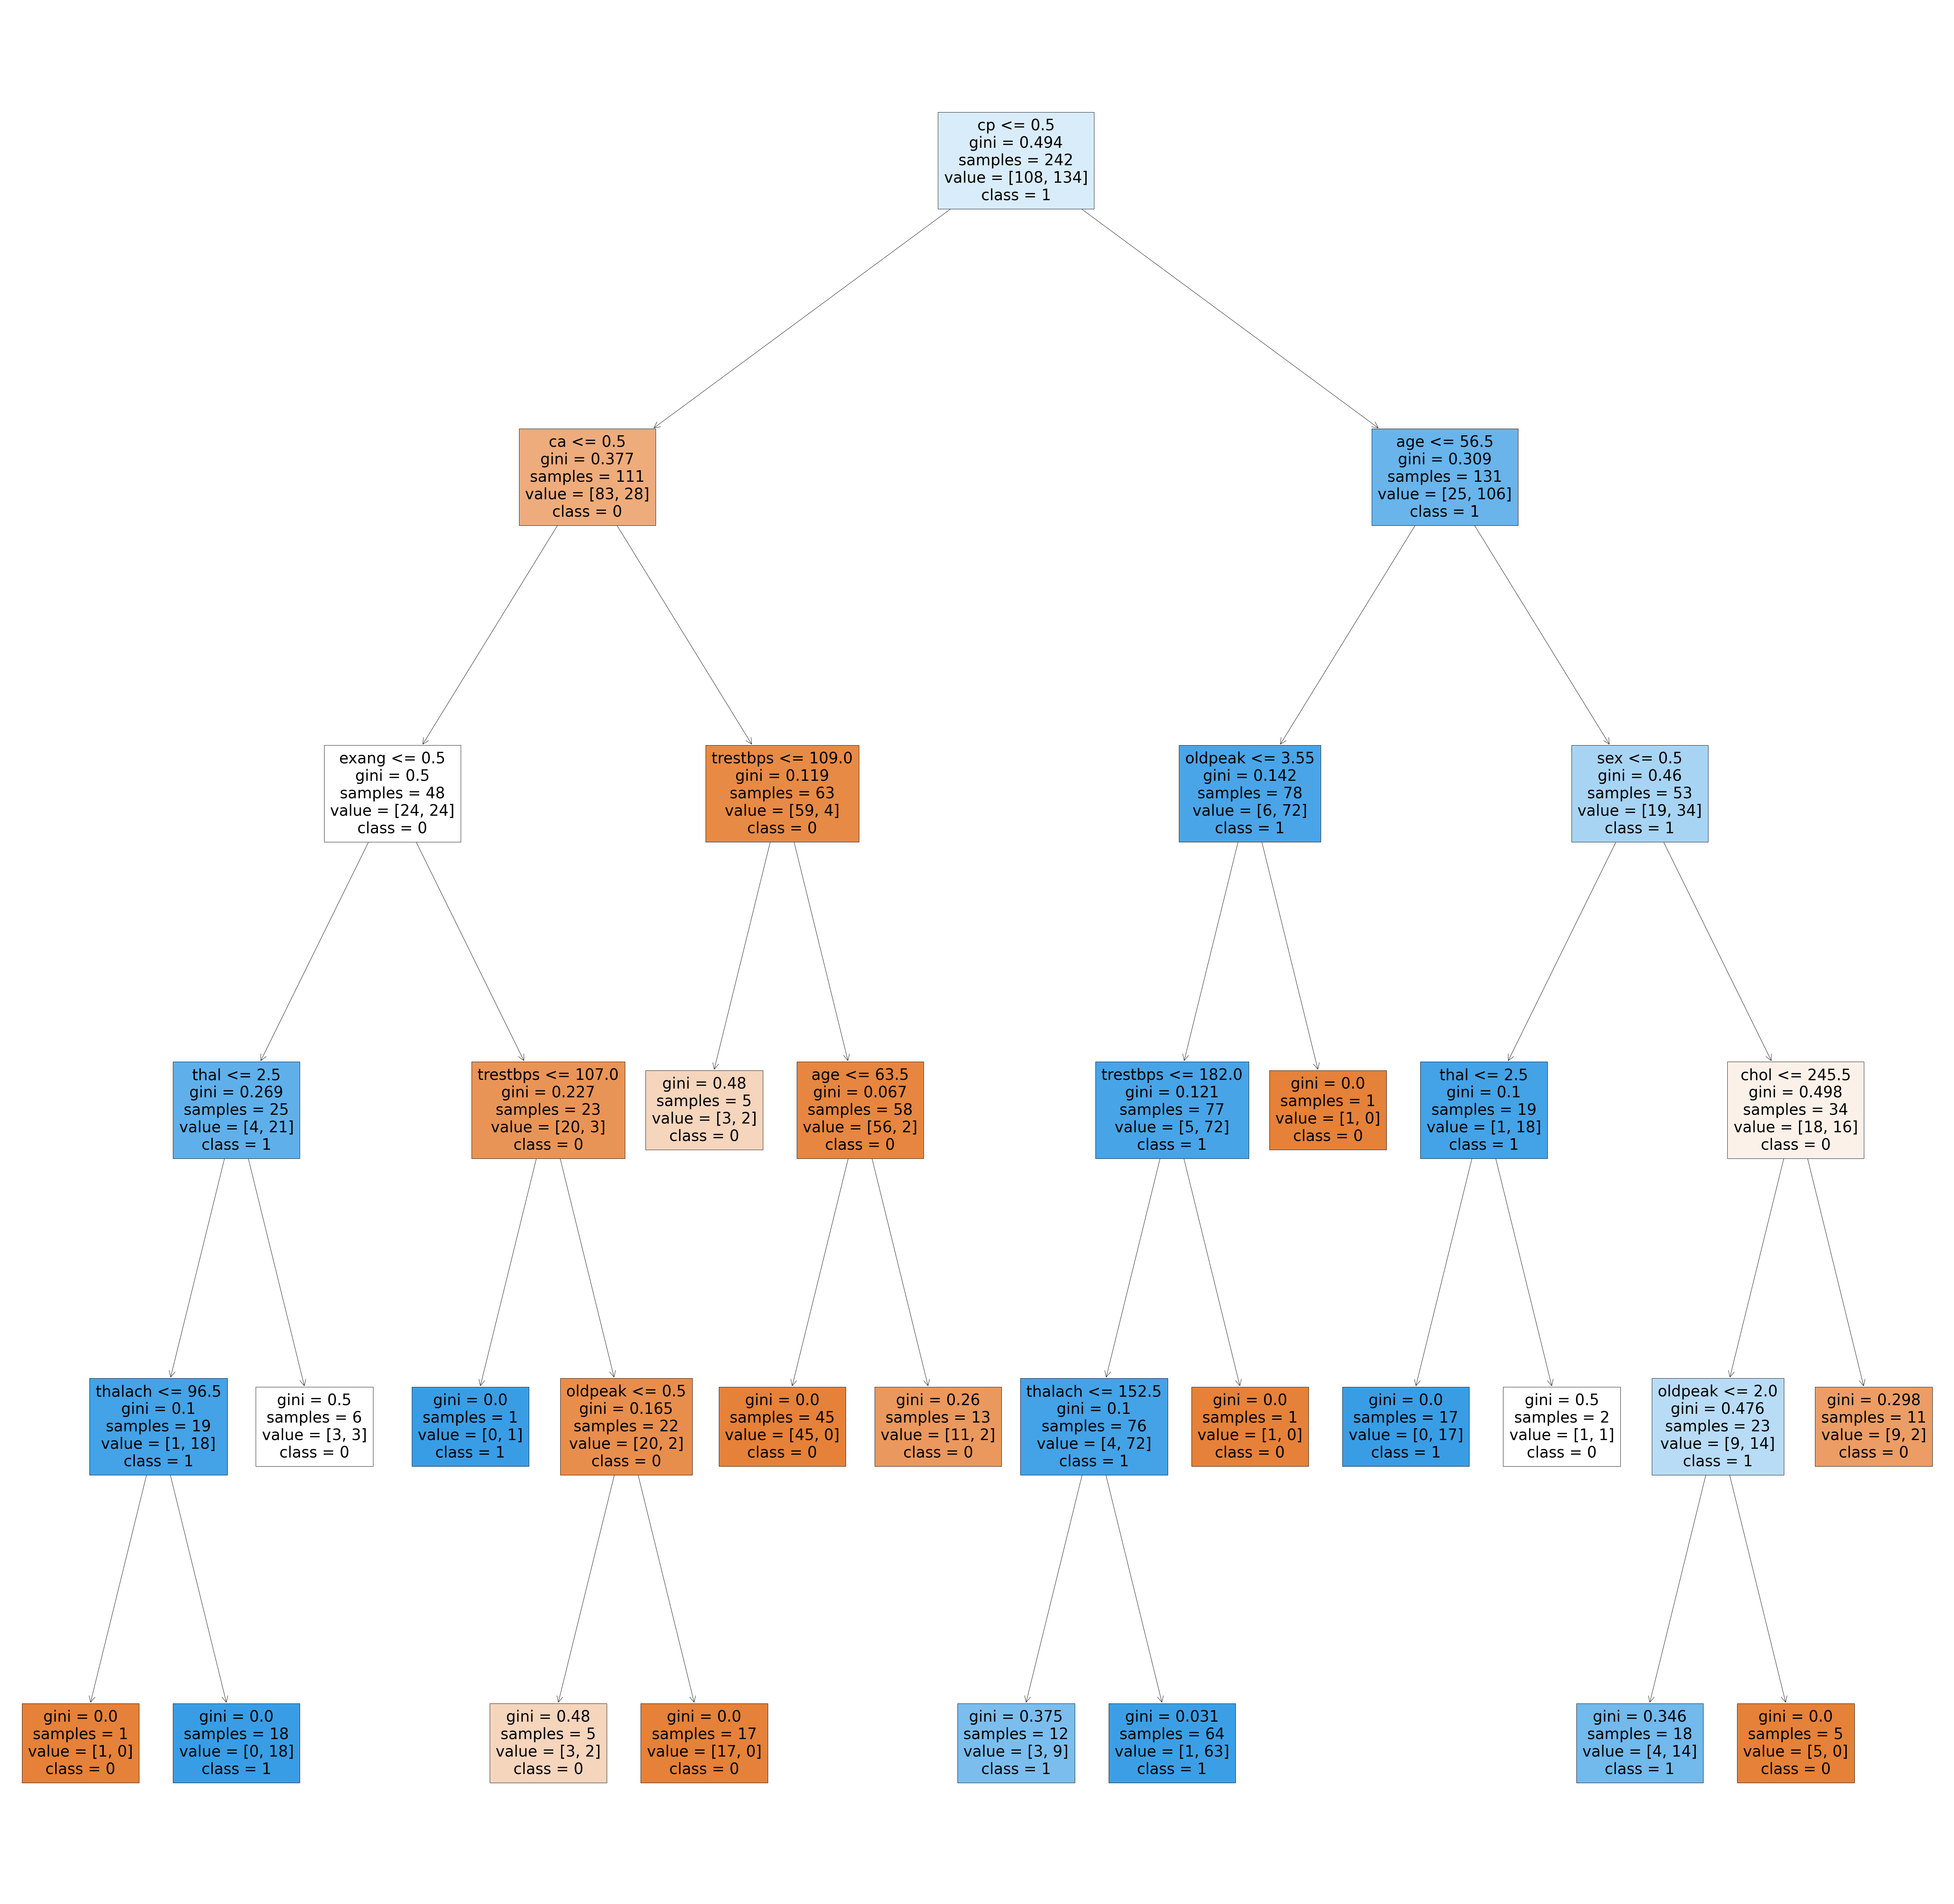

In [16]:
plt.figure(figsize=(100,100))
tree=plot_tree(gscv_dt_model.best_estimator_,feature_names=x.columns,class_names=['0','1'],filled=True)